In [1]:
import sys
from pathlib import Path

In [2]:
%load_ext autoreload
%autoreload 3 -p
%matplotlib inline

## imports

In [3]:
import pprint
import matplotlib.pyplot as plt

In [4]:
from hydra import initialize, compose

In [5]:
from object_detection_impl.train import _run

## config

In [6]:
def load_config():
    with initialize(version_base=None, config_path="../configs"):
        cfg = compose(config_name="config_mnist")
        print(cfg)
        return cfg

In [9]:
cfg = load_config()

Reloading 'object_detection_impl.models.nets.lenet'.
{'general': {'logs_folder_name': 'logs', 'root_dir': '/home/ajkdrag/workspace/projects/object-detection-impl/experiments', 'workspace': 'ajkdrag', 'project_name': 'od-impl', 'device': 'cuda', 'exp_name': 'fminst'}, 'training': {'lr': 0.0001, 'seed': 666, 'debug': False, 'n_classes': 10, 'mode': 'max', 'monitor': '${metric._primary}', 'lit_model': {'class_name': 'lit_models.image_clf.LitImageClassifier'}, 'trainer_params': {'devices': 1, 'accelerator': 'gpu', 'precision': 16, 'profiler': False, 'max_epochs': 5, 'log_every_n_steps': 50, 'num_sanity_val_steps': 0, 'check_val_every_n_epoch': 1, 'default_root_dir': '${general.root_dir}'}}, 'predict': {'checkpoint': 'model_checkpoints/epoch=4-valid_accuracy=0.855000.ckpt', 'postprocessor': {'func_name': 'postprocessor.mnist_pp.postprocess'}}, 'augmentation': {'train': [{'class_name': 'albumentations.ShiftScaleRotate', 'params': {'shift_limit': 0.0625, 'scale_limit': 0.1, 'rotate_limit': 10

## train

In [10]:
_run(cfg)

2024-05-27T15:54:17.498594Z [info     ] **** Running train func ****   func_name=_run lineno=16


/home/ajkdrag/workspace/projects/object-detection-impl/.venv/lib/python3.9/site-packages/lightning/fabric/connector.py:563: `precision=16` is supported for historical reasons but its usage is discouraged. Please set your precision to 16-mixed instead!


Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


INFO: 
  | Name    | Type             | Params
---------------------------------------------
0 | model   | LeNetV2          | 59.4 K
1 | loss    | CrossEntropyLoss | 0     
2 | metrics | ModuleDict       | 0     
---------------------------------------------
59.4 K    Trainable params
0         Non-trainable params
59.4 K    Total params
0.237     Total estimated model params size (MB)



  | Name    | Type             | Params
---------------------------------------------
0 | model   | LeNetV2          | 59.4 K
1 | loss    | CrossEntropyLoss | 0     
2 | metrics | ModuleDict       | 0     
---------------------------------------------
59.4 K    Trainable params
0         Non-trainable params
59.4 K    Total params
0.237     Total estimated model params size (MB)


Training: |                                                                                                   …

/home/ajkdrag/workspace/projects/object-detection-impl/.venv/lib/python3.9/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Validation: |                                                                                                 …

INFO: Metric valid_accuracy improved. New best score: 0.783


Metric valid_accuracy improved. New best score: 0.783


Validation: |                                                                                                 …

INFO: Metric valid_accuracy improved by 0.040 >= min_delta = 0.001. New best score: 0.823


Metric valid_accuracy improved by 0.040 >= min_delta = 0.001. New best score: 0.823


Validation: |                                                                                                 …

INFO: Metric valid_accuracy improved by 0.015 >= min_delta = 0.001. New best score: 0.839


Metric valid_accuracy improved by 0.015 >= min_delta = 0.001. New best score: 0.839


Validation: |                                                                                                 …

INFO: Metric valid_accuracy improved by 0.009 >= min_delta = 0.001. New best score: 0.848


Metric valid_accuracy improved by 0.009 >= min_delta = 0.001. New best score: 0.848


Validation: |                                                                                                 …

INFO: Metric valid_accuracy improved by 0.003 >= min_delta = 0.001. New best score: 0.851


Metric valid_accuracy improved by 0.003 >= min_delta = 0.001. New best score: 0.851
`Trainer.fit` stopped: `max_epochs=5` reached.
Restoring states from the checkpoint path at /home/ajkdrag/workspace/projects/object-detection-impl/experiments/fminst/model_checkpoints/epoch=4-valid_accuracy=0.850600.ckpt


INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at /home/ajkdrag/workspace/projects/object-detection-impl/experiments/fminst/model_checkpoints/epoch=4-valid_accuracy=0.850600.ckpt


Testing: |                                                                                                    …

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8723000288009644
      test_f1_score         0.8713961839675903
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
2024-05-27T15:56:33.361088Z [info     ] root_dir = PosixPath('/home/ajkdrag/workspace/projects/object-detection-impl/experiments/fminst') func_name=_run lineno=44


## pred

In [43]:
from object_detection_impl.predict import _run as pred_run
from torchvision.transforms.functional import to_pil_image

In [44]:
cfg = load_config()

{'general': {'logs_folder_name': 'logs', 'root_dir': '/home/ajkdrag/workspace/projects/object-detection-impl/experiments', 'workspace': 'ajkdrag', 'project_name': 'od-impl', 'device': 'cuda', 'exp_name': 'fminst'}, 'training': {'lr': 0.0001, 'seed': 666, 'debug': False, 'n_classes': 10, 'mode': 'max', 'monitor': '${metric._primary}', 'lit_model': {'class_name': 'lit_models.image_clf.LitImageClassifier'}, 'trainer_params': {'devices': 1, 'accelerator': 'gpu', 'precision': 16, 'profiler': False, 'max_epochs': 5, 'log_every_n_steps': 50, 'num_sanity_val_steps': 0, 'check_val_every_n_epoch': 1, 'default_root_dir': '${general.root_dir}'}}, 'predict': {'checkpoint': 'model_checkpoints/epoch=4-valid_accuracy=0.855000.ckpt', 'postprocessor': {'func_name': 'postprocessor.mnist_pp.postprocess'}}, 'augmentation': {'train': [{'class_name': 'albumentations.ShiftScaleRotate', 'params': {'shift_limit': 0.0625, 'scale_limit': 0.1, 'rotate_limit': 10}}, {'class_name': 'albumentations.Normalize', 'param

In [50]:
for idx, out in enumerate(pred_run(cfg)):
    if idx == 7:
        print(out.shape)
        break

2024-05-27T15:16:24.021854Z [info     ] **** Running predict func **** func_name=_run lineno=36
torch.Size([4, 3, 140, 120])


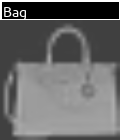

In [56]:
to_pil_image(out[2])

## exp

In [46]:
from object_detection_impl.models.nets.default import DefaultNet
from object_detection_impl.models.activations import Activations
from object_detection_impl.datamodules.image_clf_dm import ImageClfDatamodule
from object_detection_impl.lit_models.image_clf import LitImageClassifier

In [71]:
lit_model = LitImageClassifier(cfg)

In [166]:
lit_model.hparams

In [47]:
dm = ImageClfDatamodule(cfg)

In [48]:
dm.setup()

In [49]:
dl = dm.predict_dataloader()

In [60]:
dm.folder_struct_parser.class_names

['AFRICAN LEOPARD',
 'CARACAL',
 'CHEETAH',
 'CLOUDED LEOPARD',
 'JAGUAR',
 'LIONS',
 'OCELOT',
 'PUMA',
 'SNOW LEOPARD',
 'TIGER']

In [53]:
dm.folder_struct_parser.class_to_idx

{'AFRICAN LEOPARD': 0,
 'CARACAL': 1,
 'CHEETAH': 2,
 'CLOUDED LEOPARD': 3,
 'JAGUAR': 4,
 'LIONS': 5,
 'OCELOT': 6,
 'PUMA': 7,
 'SNOW LEOPARD': 8,
 'TIGER': 9}

In [54]:
dl.dataset

In [51]:
dl.dataset.class_to_idx

{}

In [148]:
len(dl.dataset)

100

In [149]:
first = next(iter(dl))

In [150]:
first["image"].shape

torch.Size([32, 224, 224, 3])

In [151]:
first["target"]

tensor([5, 7, 8, 4, 9, 8, 1, 2, 6, 7, 5, 1, 3, 9, 7, 7, 4, 9, 5, 5, 0, 1, 1, 0,
        6, 8, 1, 4, 2, 3, 3, 3])

In [152]:
dm.class_to_idx

{'AFRICAN LEOPARD': 0,
 'CARACAL': 1,
 'CHEETAH': 2,
 'CLOUDED LEOPARD': 3,
 'JAGUAR': 4,
 'LIONS': 5,
 'OCELOT': 6,
 'PUMA': 7,
 'SNOW LEOPARD': 8,
 'TIGER': 9}

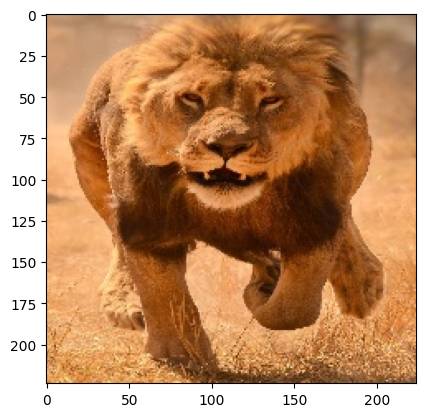

In [153]:
plt.imshow(first["image"][0])

In [83]:
cfg = load_config()

{'general': {'logs_folder_name': 'logs', 'workspace': 'ajkdrag', 'project_name': 'od-impl', 'device': 'cuda'}, 'training': {'lr': 0.0001, 'seed': 666, 'debug': True, 'n_classes': 10}, 'model': {'class_name': 'models.nets.default.DefaultNet', 'params': None, 'backbone': {'class_name': 'models.backbones.resnet.ResNetBackbone', 'params': {'arch': 'resnet18', 'pretrained': True, 'freeze': True}}, 'head': {'class_name': 'models.heads.fc.FullyConnectedHead', 'params': {'layer_units': [256, '${training.n_classes}'], 'activations': ['relu', 'sigmoid'], 'dropout_rates': [0.5, 0.5], 'avg_pool_sz': 7}}}}


In [84]:
model = DefaultNet(cfg)

Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)
[timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.


In [86]:
import torch

In [87]:
x = model(torch.rand(2, 3, 224, 224))

In [88]:
x.shape

torch.Size([2, 10])

In [37]:
x = [2, 2, 3]
y = [1, 1, 1]

In [40]:
for idx, (a, b) in enumerate(zip(x, y)):
    print(idx, a, b)

0 2 1
1 2 1
2 3 1


In [13]:
from object_detection_impl.models.backbones.resnet import ResNet

Reloading 'object_detection_impl.models.backbones.resnet'.


In [84]:
from object_detection_impl.models.nets.lenet import LeNetV2

In [85]:
l_model = LeNetV2(cfg)

In [86]:
out_blk = l_model.layer1(torch.rand([2, 3, 32, 32]))

In [87]:
out_blk.shape

torch.Size([2, 16, 10, 10])

In [90]:
out_blk2 = l_model.layer2(out_blk)

In [91]:
out_blk2.shape

torch.Size([2, 10, 5, 5])